In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
from sklearn.linear_model import LinearRegression
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.style.use('ggplot') 


In [160]:
items = pd.read_csv('../input/items.csv')
shops = pd.read_csv('../input/shops.csv')
cats = pd.read_csv('../input/item_categories.csv')
train = pd.read_csv('../input/train.csv')
test=pd.read_csv('../input/test.csv')

In [161]:
print("DATA HEAD\n\n",train.head())
train.describe();
print("\n")
train.info();
print("\n")
print("Train NULL values\n",train.isnull().sum());

DATA HEAD

          date  date_block_num  shop_id  item_id   item_price  item_cnt_day  \
0  28.12.2014              23       25    12179   959.000000           1.0   
1  23.04.2014              15       25    14042   149.000000           1.0   
2  03.03.2014              14       12    11373   106.615385          13.0   
3  08.12.2013              11       47    12107   599.000000           1.0   
4  23.01.2015              24       29     3341  2599.000000           1.0   

        ID  
0  2317582  
1  1576962  
2  1547382  
3  1255724  
4  2372492  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925849 entries, 0 to 2925848
Data columns (total 7 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
ID                int64
dtypes: float64(2), int64(4), object(1)
memory usage: 156.3+ MB


Train NULL values
 date              0
date_block_num    0
shop_id           0
item_id  

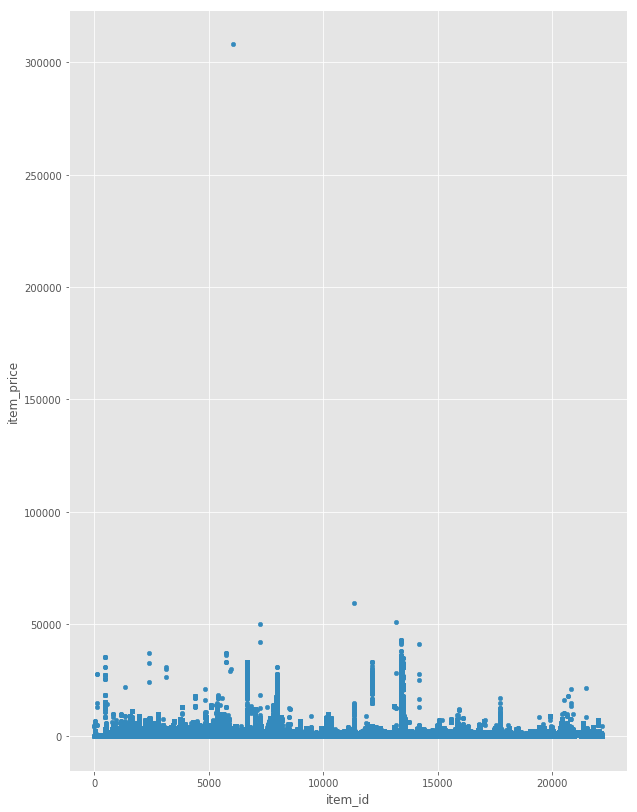

(2925849, 7)
(2925847, 7)


In [162]:
train.plot(kind="scatter", x="item_id", y="item_price", figsize=(10,14));
plt.show()
print(train.shape)
train = train[(train.item_price > 0) & (train.item_price < 300000)]
print(train.shape)

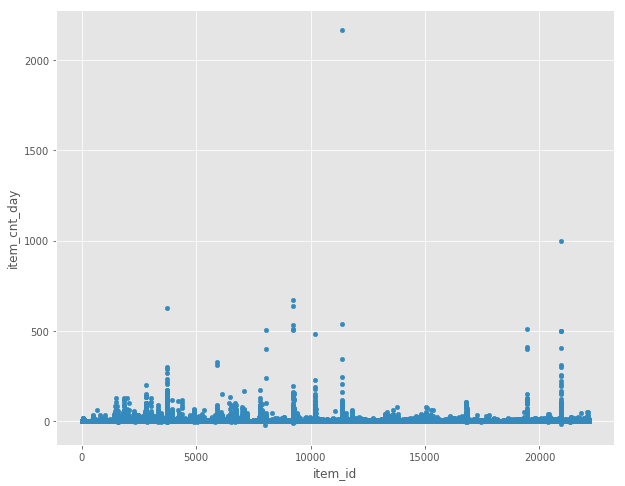

In [163]:
train.plot(kind="scatter", x="item_id", y="item_cnt_day", figsize=(10,8))
plt.show()

In [164]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID
0,28.12.2014,23,25,12179,959.000000,1.0,2317582
1,23.04.2014,15,25,14042,149.000000,1.0,1576962
2,03.03.2014,14,12,11373,106.615385,13.0,1547382
3,08.12.2013,11,47,12107,599.000000,1.0,1255724
4,23.01.2015,24,29,3341,2599.000000,1.0,2372492


In [165]:
train.item_cnt_day[train['item_cnt_day']>999].value_counts()
train = train[(train.item_cnt_day> 0) & (train.item_cnt_day < 2000)]
print(train.shape)

(2918522, 7)


In [166]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
y_train=np.hstack([train['item_cnt_day'].values.reshape(-1,1)])

In [167]:
y_train
train['item_cnt_day'].value_counts()

1.0      2620428
2.0       193555
3.0        47167
4.0        19621
5.0        10428
6.0         6315
7.0         4042
8.0         2897
9.0         2171
10.0        1815
11.0        1258
12.0        1081
13.0         916
14.0         712
15.0         634
16.0         543
17.0         436
18.0         390
20.0         364
19.0         347
21.0         289
22.0         242
24.0         204
23.0         198
25.0         180
26.0         176
30.0         147
28.0         131
27.0         130
31.0         122
          ...   
113.0          1
112.0          1
128.0          1
129.0          1
109.0          1
131.0          1
132.0          1
135.0          1
105.0          1
140.0          1
102.0          1
146.0          1
147.0          1
96.0           1
149.0          1
504.0          1
153.0          1
154.0          1
156.0          1
157.0          1
161.0          1
163.0          1
164.0          1
167.0          1
95.0           1
93.0           1
179.0          1
118.0         

In [168]:
print (train.shape)

(2918522, 7)


In [169]:
x_train=np.hstack([train['date_block_num'].values.reshape(-1,1),train['shop_id'].values.reshape(-1,1),train['item_id'].values.reshape(-1,1),train['item_price'].values.reshape(-1,1)])

In [170]:
x_train

array([[2.30000000e+01, 2.50000000e+01, 1.21790000e+04, 9.59000000e+02],
       [1.50000000e+01, 2.50000000e+01, 1.40420000e+04, 1.49000000e+02],
       [1.40000000e+01, 1.20000000e+01, 1.13730000e+04, 1.06615385e+02],
       ...,
       [2.30000000e+01, 3.10000000e+01, 3.39300000e+03, 9.96070000e+02],
       [3.00000000e+01, 3.10000000e+01, 2.00360000e+04, 3.99000000e+02],
       [2.30000000e+01, 4.70000000e+01, 1.53950000e+04, 6.49000000e+02]])

In [171]:
lm.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [172]:
c_pred = lm.intercept_
c_pred

array([1.15023574])

In [173]:
m_pred = lm.coef_
m_pred
x_test=np.vstack([test['date_block_num'].values.reshape(-1,1),test['shop_id'].values.reshape(-1,1),test['item_id'].values.reshape(-1,1),test['item_price'].values.reshape(-1,1)])

In [174]:
x_test

array([[ 25.],
       [ 10.],
       [ 24.],
       ...,
       [349.],
       [349.],
       [199.]])

In [175]:
x_train[:,0]

array([23., 15., 14., ..., 23., 30., 23.])

In [176]:
y_pred = lm.predict(x_train)
def loss(y_train, y_predicted):
    return np.mean(np.square(y-y_predicted))

In [177]:
loss(y_train,y_pred)

5.259504518480394

In [178]:
y_pred

array([[1.28833252],
       [1.26875962],
       [1.25686031],
       ...,
       [1.21782457],
       [1.34512647],
       [1.28716131]])

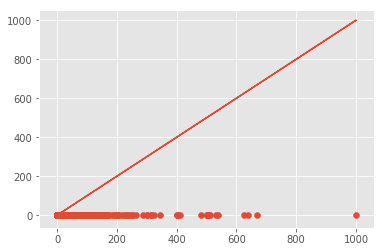

In [179]:
plt.plot(y_train, y_train,'-')
plt.scatter(y_train, y_pred)
plt.show()

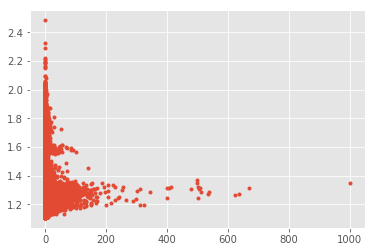

In [180]:
plt.plot(y_train, y_pred,'.')
plt.show()